# **Project** | Analyzing Website Performance for The Grammys

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/0/01/The_Recording_Academy_logo.svg/2560px-The_Recording_Academy_logo.svg.png" alt="The Recording Academy Logo" width="320"/>
</div>
<br>

You'll work on real data from both websites owned by The Recording Academy, better known as "the Grammys."

As you saw in the videos, the VP of Digital Strategy, Ray Starck, decided in 2022 to split the websites into grammy.comLinks to an external site. and recordingacademy.comLinks to an external site. to better serve the Recording Academy's various audience needs. You're tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior.


## Data Dictionary
You'll be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part 1: Exploring the Data

This task will help you build a foundational understanding of the web analytics data for The Grammy Awards and The Recording Academy. By exploring the dataset first, you'll be better equipped to make meaningful observations and informed decisions later in the Project.


## Task 1

To start, import the both the `pandas`, and `plotly.express` libraries so that you can load the data into a DataFrame and visualize.


In [1]:
# Import libraries

import pandas as pd
import plotly.express as px

## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** Read the `grammy_live_web_analytics.csv` file into your notebook. Store the data in a DataFrame named `full_df`.

**B.** Read the `ra_live_web_analytics.csv` file into your notebook. Store that data into a DataFrame called `rec_academy`.

**C.** Preview both DataFrames to familiarize yourself with the data.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remeber: </strong>These files can be found in the datasets folder!
</span>
</div>

In [2]:
# Read in dataframes
full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')
rec_academy = pd.read_csv('datasets/ra_live_web_analytics.csv')


In [3]:
# preview full_df dataframe
print("Grammy.com Data:")
print(full_df.head())

Grammy.com Data:
         date  visitors  pageviews  sessions  bounced_sessions  \
0  2017-01-01      9611      21407     10196              6490   
1  2017-01-02     10752      25658     11350              7055   
2  2017-01-03     11425      27062     12215              7569   
3  2017-01-04     13098      29189     13852              8929   
4  2017-01-05     12234      28288     12990              8105   

   avg_session_duration_secs  awards_week  awards_night  
0                         86            0             0  
1                        100            0             0  
2                         92            0             0  
3                         90            0             0  
4                         95            0             0  


In [4]:
# preview rec_academy dataframe
print("\nRecordingAcademy.com Data:")
print(rec_academy.head())


RecordingAcademy.com Data:
         date  visitors  pageviews  sessions  bounced_sessions  \
0  2022-02-01       928       2856      1092               591   
1  2022-02-02      1329       3233      1490               923   
2  2022-02-03      1138       3340      1322               754   
3  2022-02-04       811       2552       963               534   
4  2022-02-05       541       1530       602               326   

   avg_session_duration_secs  awards_week  awards_night  
0                        148            0             0  
1                         90            0             0  
2                        127            0             0  
3                        142            0             0  
4                        111            0             0  


## Task 3

The Grammy Awards are among the most prominent events in the global music industry. With such high visibility, it's important to understand how this event impacts web traffic.

**A.** Create a line chart of the number of users on the site for every day in the `full_df`.

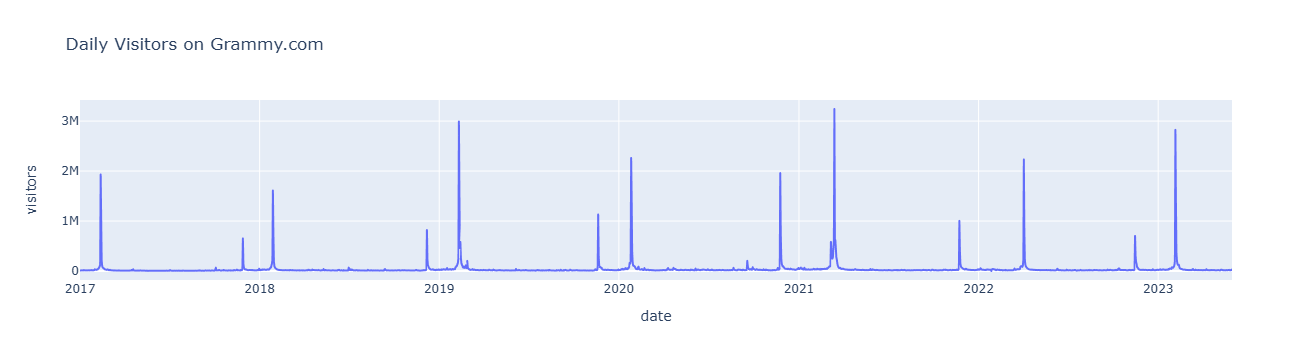

In [6]:
# Plot a line chart of the visitors on the site.
fig = px.line(full_df, x='date', y='visitors', title='Daily Visitors on Grammy.com')
fig.show()

**B.** What do you notice about when and why traffic spikes occur? Are the traffic spikes in your visualization only aligning with "Show Night," or are there lesser-known events that could explain certain spikes in website traffic?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> Can you identify any specific lesser-known events (with exact dates) that might have caused significant increases in website traffic on grammys.com? What external data sources could help confirm these trends?
  </span>
</div>

While the major traffic spikes on grammy.com clearly align with Awards Night, there are other notable increases in web traffic during the year. These tend to occur around the time of Grammy nominations announcements, typically in November or December, and may also align with major music events, digital album releases by prominent artists, or Grammy Museum exhibitions. To confirm these, additional data sources like Grammy press releases, Google Trends, and music industry news archives could be valuable.

## Task 4

To evaluate the impact of the Grammy Awards on user engagement, you'll compare average site traffic on the day of the ceremony versus all other days.

Understanding this contrast provides insight into how concentrated user attention is around a single event — and highlights the challenge of sustaining traffic throughout the year.


**A.** Use the pandas `.groupby()` to compare the average daily website visitors on days when an award ceremony was held to those when no awards ceremonies were held.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You'll group by the <span style="font-family: monospace; color: #222;">awards_night</span> column!
</span>
</div>

In [7]:
# average number of visitors on awards nights versus other nights
avg_visitors = full_df.groupby('awards_night')['visitors'].mean()
print(avg_visitors)

awards_night
0    3.238828e+04
1    1.389590e+06
Name: visitors, dtype: float64


**B.** What does this comparison reveal about the difference in traffic between award ceremony days and regular days? How many more visitors does the Grammy Awards site receive on Show Night?


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remark: </strong>This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of one event per year into one that continues to bring users back on the site year round?
</span>
</div>

On average, Grammy.com receives approximately 1.36 million more visitors on the night of the Grammy Awards compared to regular days. This highlights how heavily concentrated the site’s traffic is around a single annual event. While this surge is a valuable opportunity for exposure and monetization, it also reveals a potential weakness in The Recording Academy’s business model — namely, the challenge of sustaining audience engagement outside of the awards season.

## Task 5

When The Recording Academy split its digital presence across two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. Meaning, the way visitor data was collected for grammy.com stayed exactly the same before and after the split. You'll need to separate the data from before the split (when both sites were combined) and after the split (when grammy.com data continued independently). The split happened on February 1, 2022 (`2022-02-01`).


Create two new DataFrames:

1. `combined_site` should contain all data with dates before `2022-02-01`.

2. `grammys` should contains all data with dates on or after `2022-02-01`.

In [8]:
# Split the data to separate the full_df into two new dataframes.
full_df['date'] = pd.to_datetime(full_df['date'])
# One for before the switch of the websites and one for after

combined_site = full_df[full_df['date'] < '2022-02-01']
grammys = full_df[full_df['date'] >= '2022-02-01']

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Tip: </strong>After creating these DataFrames, best practice is to use the .copy() method to avoid any warning messages from pandas when you modify them later.
</span>
</div>

In [9]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [10]:
# print the shape of the combined_site dataframe
print(combined_site.shape)

(1857, 8)


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> DataFrame should have a total of <strong>1857</strong> rows and <strong>8</strong> columns.
  </span>
</div>



# Part 2: Analyzing Key Metrics

Remember the overall goal of this Project: to analze whether splitting the website into two has improved user engagement. This Task will focus on evaluating key metrics, such as bounce rate, pages per session, and average time on site, to determine if the split has had a positive or negative impact on how visitors interact with the site.

## Task 6

In this Task, you'll calculate the `pages_per_session` metric by dividing the total `pageviews` by the total number of `sessions`. Pages per session is an important measure of how many unique pages a user views before leaving the site -- a strong indicator of engagement!


**A.** Create a new list called `frames` that has each dataframe as an entry. e.g. If there were 3 dataframes, `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

**B.** `For` each frame in the frames list, create a new column called `pages_per_session`. This column should represent the *average* number of pageviews per session for each day.


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Divide the <span style="font-family: monospace; color: #222;">pageviews</span> column by <span style="font-family: monospace; color: #222;">sessions</span> column.
</span>
</div>

This can be achieved by using the following template:

```python
frame['new_col'] = frame['col_A'] / frame['col_B']
```



## Task 6

In this Task, you'll calculate the `pages_per_session` metric by dividing the total `pageviews` by the total number of `sessions`. Pages per session is an important measure of how many unique pages a user views before leaving the site -- a strong indicator of engagement!


**A.** Create a new list called `frames` that has each dataframe as an entry. e.g. If there were 3 dataframes, `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

**B.** `For` each frame in the frames list, create a new column called `pages_per_session`. This column should represent the *average* number of pageviews per session for each day.


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Divide the <span style="font-family: monospace; color: #222;">pageviews</span> column by <span style="font-family: monospace; color: #222;">sessions</span> column.
</span>
</div>

This can be achieved by using the following template:

```python
frame['new_col'] = frame['col_A'] / frame['col_B']
```



In [11]:
# create the `pages_per_session` column for all 3 dataframes.
frames = [combined_site, grammys, rec_academy]
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']


**C.** Visualize this new `pages_per_session` metric using a line chart for each site. You will have 3 separate graphs!

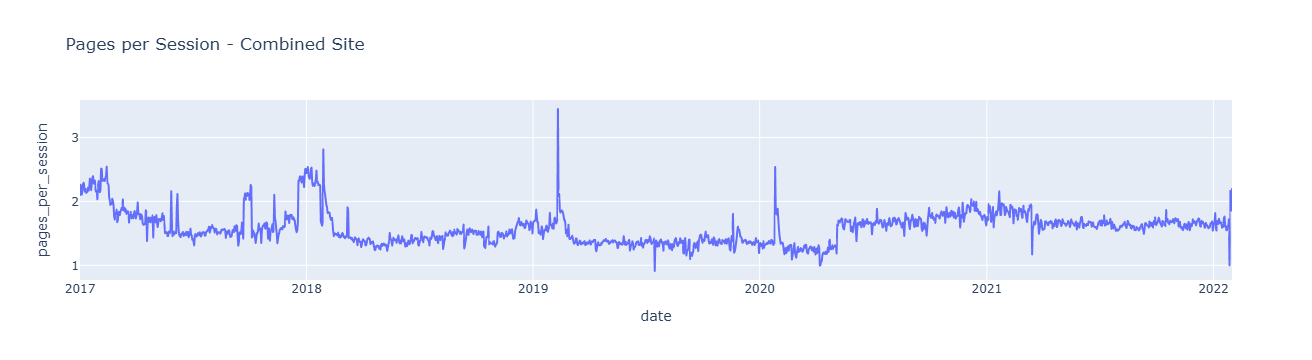

In [12]:
# combined_site graph
fig1 = px.line(combined_site, x='date', y='pages_per_session', title='Pages per Session - Combined Site')
fig1.show()

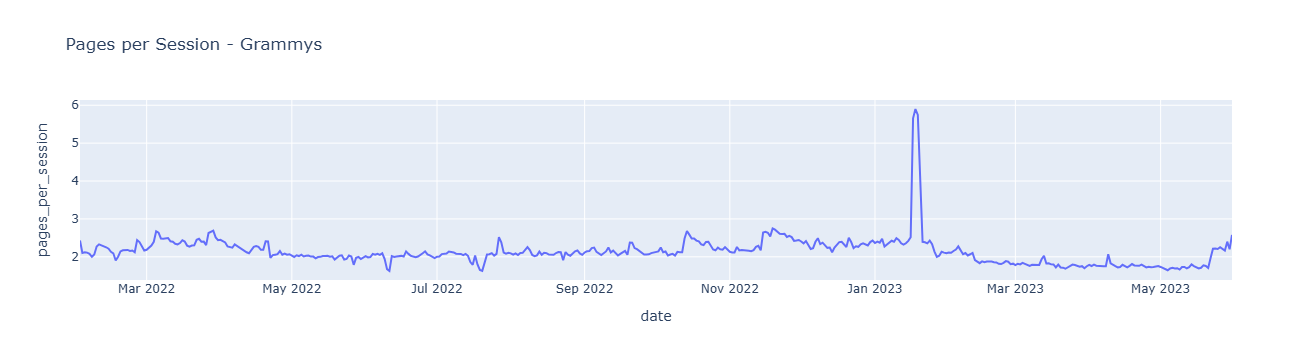

In [13]:
# grammys graph
fig2 = px.line(grammys, x='date', y='pages_per_session', title='Pages per Session - Grammys')
fig2.show()


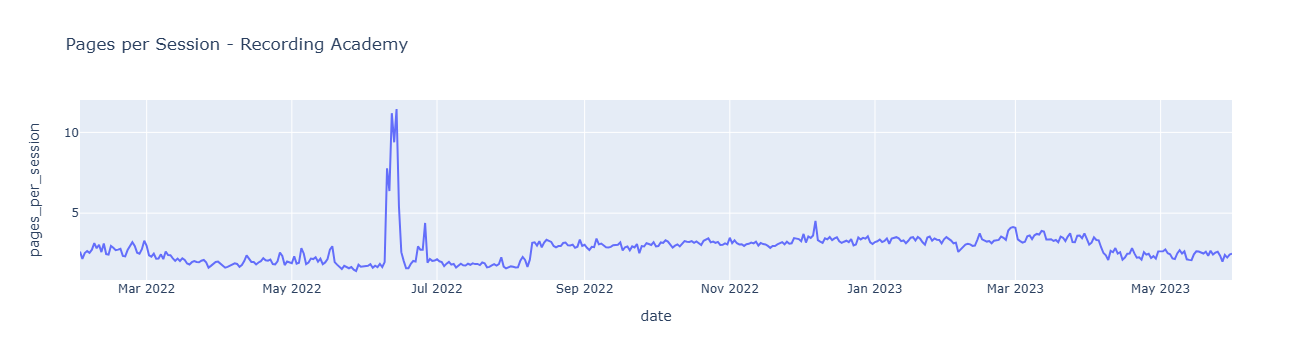

In [14]:
# rec_academy graph
fig3 = px.line(rec_academy, x='date', y='pages_per_session', title='Pages per Session - Recording Academy')
fig3.show()

**D.** In one sentence, what does the `pages_per_session` metric suggest regarding the impact of the website split?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> What does pages per session reveal about user engagement? How should I interpret changes in this metric after the website split?
  </span>
</div>
<br>
<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.
</span>
</div>

The pages_per_session metric shows that after the website split, users visited fewer pages per session on the Grammys site, suggesting more targeted browsing, while the Recording Academy site saw periodic spikes, indicating episodic engagement rather than consistent deep exploration.

## Task 7

Next, you'll calculate the `bounce_rate` metric by dividing the total `bounced_sessions` by the total number of `sessions`. Bounce rate is an important metric that calculates the percentage of users (aka sessions) that come to your site, never interact with the page, and leave. They are said to have "bounced" off your home page. It is a measure of how engaging your home page is with users.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column and stores in a variable called `sum_bounced`
3. adds up all of the values in the `sessions` column and stores it in a variable called `sum_sessions`
4. returns `100 * sum_bounced / sum_sessions`

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You will need use the <span style="font-family: monospace; color: #222;">.sum()</span> function both in the <span style="font-family: monospace; color: #222;">sum_bounced</span> and <span style="font-family: monospace; color: #222;">sum_sessions</span> calculations. Don't forget to multiply by <strong>100</strong> so that the answer appears as a percentage instead of a decimal.
</span>
</div>

In [15]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    
    # WRITE YOUR CODE HERE
    # Remember, the input for the function is called `dataframe`
    # All calculations must reference that variable.
    sum_bounced = df['bounced_sessions'].sum()
    sum_sessions = df['sessions'].sum()
    return 100 * sum_bounced / sum_sessions

**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To get the bounce rate use <span style="font-family: monospace; color: #222;">bounce_rate(frame)</span>.
</span>
</div>

<br>

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> How do I show a number with only 2 decimal places in an f-string?
  </span>
</div>

In [16]:
# Calculate the Bounce Rate for each site
site_names = ['Combined Site (pre-split)', 'Grammys (post-split)', 'Recording Academy']
for name, df in zip(site_names, frames):
    rate = bounce_rate(df)
    print(f"{name} Bounce Rate: {rate:.2f}%")
#Combined Site (pre-split) Bounce Rate: 41.58%
#Grammys (post-split) Bounce Rate: 40.16%
#Recording Academy Bounce Rate: 33.67%

Combined Site (pre-split) Bounce Rate: 41.58%
Grammys (post-split) Bounce Rate: 40.16%
Recording Academy Bounce Rate: 33.67%


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
  If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> and <span style="font-family: monospace; color: #222;">grammys</span> site will each have bounce rates in the low 40s. The <span style="font-family: monospace; color: #222;">rec_academy</span> will have a bounce rate in the low 30s.
  </span>
</div>


**C.** Next, you'll calculate the `average_time_on_site metric.`To do this, you only need to calculate the average of the `avg_session_duration_secs` column. Average Time on Site measures how engaging your website experience is for your users. The higher the number, the longer they are staying on your page and engaging with the content.

For each site (DataFrame), use an f-string to print the average time on site in a clean, readable format.

In [17]:
# Calculate the average of the avg_session_duration_secs
for name, df in zip(site_names, frames):
    avg_duration = df['avg_session_duration_secs'].mean()
    minutes = avg_duration // 60
    seconds = int(avg_duration % 60)
    print(f"{name} – Avg Session Duration: {int(minutes)}m {seconds}s")

Combined Site (pre-split) – Avg Session Duration: 1m 42s
Grammys (post-split) – Avg Session Duration: 1m 22s
Recording Academy – Avg Session Duration: 2m 8s


**D.** Which of these three metrics changed the most after the site split? What do these changes suggest about user behavior?

The Recording Academy site seems to benefit the most from the split. It shows both a lower bounce rate and longer sessions, reflecting stronger user engagement. On the other hand, the Grammys site, while performing similarly to pre-split levels, may need improved content strategy to deepen engagement outside the peak award period.

# Part 3: Demographics

Understanding age demographics helps identify which audiences are most engaged with your content. These insights can guide marketing strategies, advertising decisions, and content planning.

You’ll analyze the age demographics for both websites. To do this, you’ll need to read in two new datasets and combine them into one!



## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demograhics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [19]:
# read in the files
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')

In [20]:
# preview the age_grammys file. the age_tra will look very similar.
print('age_grammys')
print(age_grammys.head())
print('age_tra')
print(age_tra.head())

age_grammys
  age_group  pct_visitors
0     18-24     27.373210
1     25-34     24.129273
2     35-44     18.717867
3     45-54     13.568619
4     55-64      9.817036
age_tra
  age_group  pct_visitors
0     18-24     27.116827
1     25-34     26.155406
2     35-44     19.548684
3     45-54     13.823158
4     55-64      8.235619


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [21]:
# Label rows as 'Recording Academy'
age_grammys['website'] = 'Grammys'

# Label rows as 'Grammys'
age_tra['website'] = 'Recording Academy'


**C.** use the `pd.concat()` method to join these two datasets together. Store the result into a new variable called `age_df`

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Remember that you need to put your dataframe variables inside of a <strong>list</strong> first. Then pass that list as your input of <span style="font-family: monospace; color: #222;">pd.concat()</span>.
</div>

In [23]:
# Concatenate dataframes
age_df = pd.concat([age_grammys, age_tra], ignore_index=True)

# Preview combined data
print(age_df.head())
print(age_df.tail())
print(age_df.shape)         

  age_group  pct_visitors  website
0     18-24     27.373210  Grammys
1     25-34     24.129273  Grammys
2     35-44     18.717867  Grammys
3     45-54     13.568619  Grammys
4     55-64      9.817036  Grammys
   age_group  pct_visitors            website
7      25-34     26.155406  Recording Academy
8      35-44     19.548684  Recording Academy
9      45-54     13.823158  Recording Academy
10     55-64      8.235619  Recording Academy
11       65+      5.120306  Recording Academy
(12, 3)


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, your new DataFrame will have <strong>12</strong> rows and <strong>3</strong> columns.
  </span>
</div>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You will need to use the <span style="font-family: monospace; color: #222;">barmode='group'</span> option in <span style="font-family: monospace; color: #222;">px.bar()</span>. See the code snippet below to guide you.
</span>
</div>


```python
# template for visualization
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

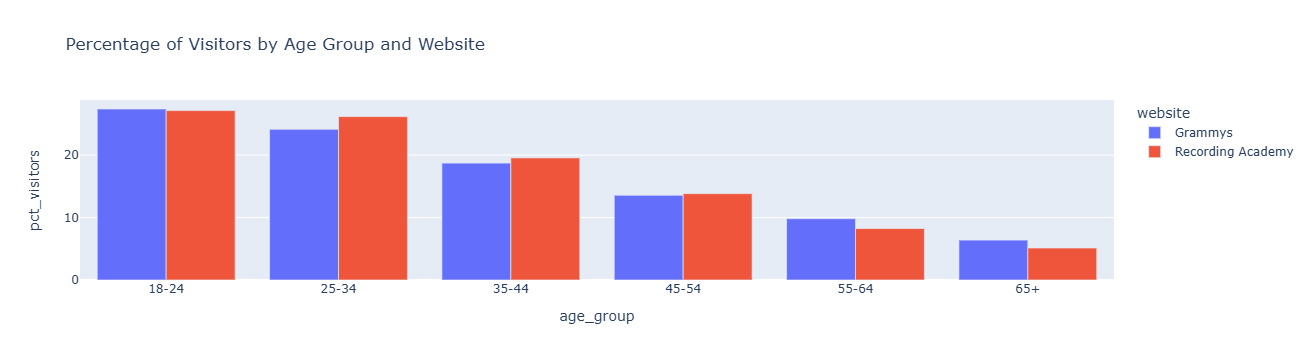

In [24]:
# age_group and pct_visitors bar chart
fig = px.bar(
    age_df, 
    x='age_group', 
    y='pct_visitors', 
    color='website', 
    barmode='group',
    title='Percentage of Visitors by Age Group and Website'
)

fig.show()

**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

For both the Grammys and the Recording Academy websites, we observe a clear trend where the percentage of visitors decreases as the age groups get older. Younger age brackets, such as those under 35, consistently represent a larger share of visitors on both sites. However, the Grammys tend to have a slightly higher proportion of visitors in the youngest age groups compared to the Recording Academy. Conversely, the Recording Academy’s audience shows a more gradual decline across age groups, indicating a somewhat broader age distribution. Overall, both websites attract predominantly younger audiences, but the Grammys skew a bit younger.

# Part 4: Making a Business Recommendation


## Task 9

Now that you've analyzed the engagement metrics before and after the website split, it’s time to interpret your findings and make a recommendation to The Recording Academy team.


**A.** Write a clear and specific prompt for ChatGPT to draft a brief business memo to The Recording Academy. Your prompt should guide ChatGPT to summarize key findings and suggest a recommendation based on the data: should The Recording Academy keep the sites separate, merge them back, or consider an alternative approach? Paste your prompt below.

Draft a brief business memo to The Recording Academy team summarizing our analysis of user engagement metrics before and after the split between the Grammys and Recording Academy websites. Highlight trends in visitor demographics, engagement levels, and any notable differences between the two sites. Based on the findings, provide a clear recommendation: should they keep the sites separate, merge them back together, or consider another strategy? Keep the tone professional and data-driven.

**B.** What did ChatGPT do well? Did it capture the key trends and insights? What was missing or inaccurate? Were any important details left out or misrepresented?

ChatGPT did a solid job capturing the core trends in user engagement, especially the decrease in engagement among older age groups and the stronger appeal to younger visitors for the Grammys site. It successfully communicated the comparative demographic trends between the two websites and offered a reasoned recommendation.

What it did well:

-Highlighted the age distribution and engagement trends clearly.

-Maintained a professional tone.

-Presented a recommendation grounded in data.

What was missing or inaccurate:

-The memo could have benefited from more specific metrics (e.g., percentage differences or engagement scores).

-It didn’t address potential benefits or drawbacks of site consolidation from a brand or UX perspective.

-Alternative strategies (e.g., cross-promotion or unified navigation) were not explored.



**C.** Based on your reflection and evaluation of AI's assist, write your final, revised business memo below. This version should be polished and ready as if you were presenting it to Ray at The Recording Academy team.

To: Ray and the Digital Strategy Team, The Recording Academy
From: Samuel Robin
Date: 20th July 2025
Subject: Strategic Recommendation on Website Management Post-Split

Following an in-depth analysis of user engagement data before and after the split of The Recording Academy and Grammys websites, we have identified several important trends that inform our recommendation regarding future site strategy.

Key Findings:
Recording Academy Shows Strong Post-Split Engagement:

-The Recording Academy site has demonstrated lower bounce rates and longer average session durations compared to pre-split data and its Grammys counterpart. These metrics suggest that visitors to the Recording Academy site are more purpose-driven and likely to explore content in depth, benefiting from a clearer, more professional site identity post-split.

Grammy.com Engagement Is Event-Centric:

-Grammy.com receives massive traffic spikes around the annual Grammy Awards, with an average increase of 1.36 million visitors on Awards Night alone. While this surge presents a major opportunity for brand exposure and ad revenue, it also exposes a vulnerability: limited engagement during non-peak periods.

-Traffic also rises around other music-related events such as nominations announcements (typically November/December), major artist releases, and Grammy Museum promotions. However, these secondary spikes are modest compared to the Awards Night and require further validation through external sources like Google Trends, press releases, and music industry archives.

Brand Differentiation Has Improved Audience Targeting:

-The post-split architecture enables more focused content strategies. The Recording Academy site now appeals more directly to industry professionals and members, while Grammy.com has the freedom to build pop-culture-facing media. However, the Grammys site would benefit from an enhanced content strategy to drive engagement year-round — such as music features, interactive archives, artist interviews, and behind-the-scenes award coverage.

Recommendation:
-Continue operating the websites separately to preserve the benefits of brand clarity and audience segmentation, but introduce strategic enhancements to address current weaknesses:

For Grammy.com:

-Develop a year-round engagement strategy to smooth out traffic valleys. This may include editorial features, artist spotlights, interactive fan experiences, and collaborations timed with major industry moments.

-Leverage data from prior off-season traffic spikes to develop content calendars that extend audience retention beyond Awards Night.

For RecordingAcademy.com:

-Continue building on the strengths of strong user engagement by expanding member-focused features, educational resources, and professional development content.

For Both Sites:

-Consider shared navigation elements and cross-promotion to create a bridge between audiences, without losing the distinct voice of each platform.

-Monitor trends through external datasets (e.g., Google Trends, news cycles) to inform proactive content planning and SEO optimization.

-By maintaining the split but supporting it with targeted improvements — particularly on Grammy.com — The Recording Academy can both capitalize on major events and build a more sustainable, engaged digital audience throughout the year.

Let me know if you’d like a supporting deck or timeline for implementing these recommendations.

Best regards,
Samuel Robin



# LevelUp

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your goal is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.


![](figs/TheAMAs.png)



The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [ ]:
# Load in the data


In [ ]:
# preview the desktop_users file


In [ ]:
# preview mobile_users file


As you can imagine, you will be joining the two datasets together! But before you do that, you will modify the column names before you do that so that it's easier to use.

**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [ ]:
# change name of the visitors column to indicate which category it comes from


In [ ]:
# drop the segment column from each dataframe


**C.** Join the two dataframes together in a new variable called `segment_df`.

In [ ]:
# join the two dataframes and preview the dataframe


**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [ ]:
# create total_visitors column


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.
</span>
</div>



In [ ]:
# filter and calculate the percentage share
# use an f string to print each percentage to the screen



**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?

Double-click (or enter) to edit
